# liNEAR REGRESSION

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline

In [123]:
# read training data into a dataframe
df = pd.read_csv('DC_Properties.csv')

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [124]:
# Show the first two rows of dataframe
df.head(2)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [125]:
# Some statistical information about the data
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [126]:
df['INTWALL'].unique()

array(['Hardwood', 'Wood Floor', 'Hardwood/Carp', 'Carpet', 'Lt Concrete',
       'Vinyl Comp', 'Ceramic Tile', 'Default', 'Terrazo', 'Parquet',
       'Vinyl Sheet', 'Resiliant', nan], dtype=object)

In [127]:
# Checking if there are missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

# histogram of each column 

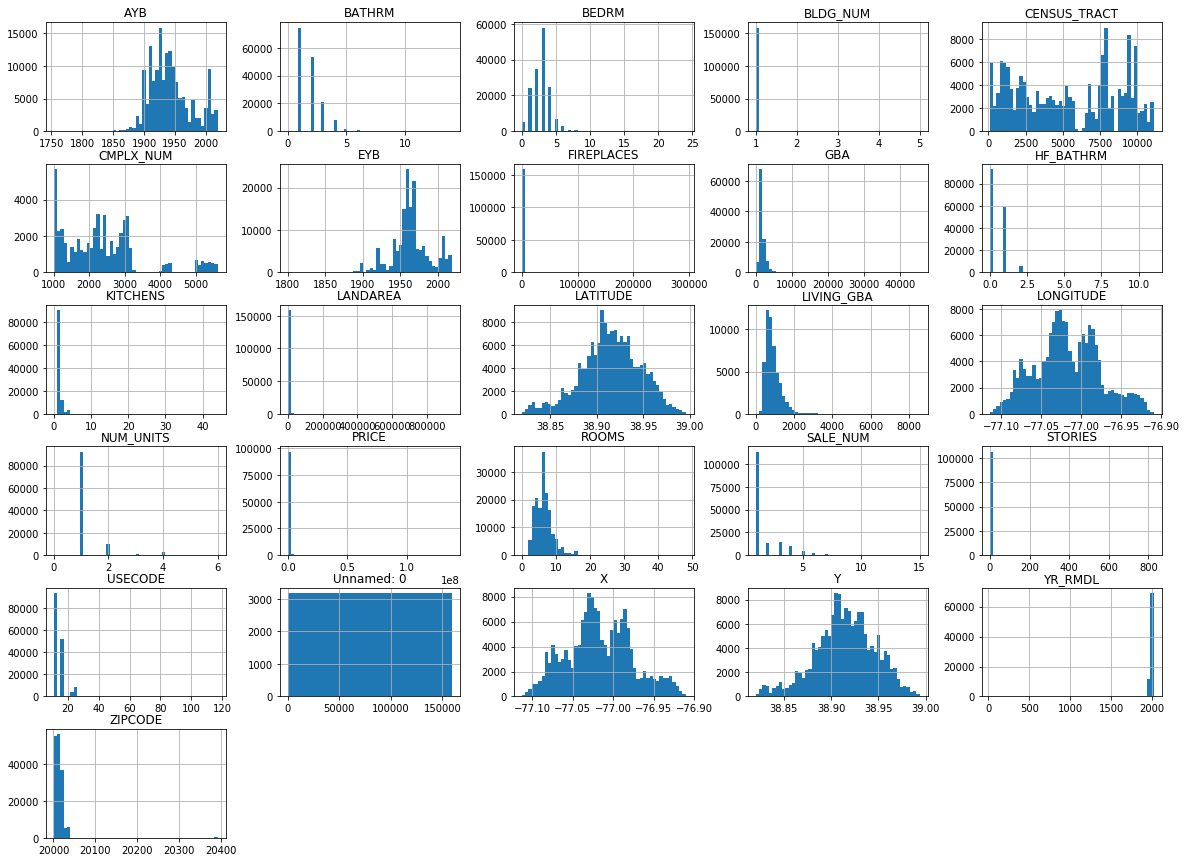

In [128]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F60DA1780>]],
      dtype=object)

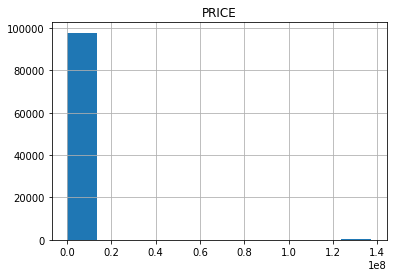

In [129]:
#plt.figure(figsize=(15,15))
df.hist(column='PRICE', bins=10)

In [130]:
# Delete non-Residential in Source column 

In [131]:

df= df[df.SOURCE == 'Residential']

In [132]:
# Checking if there are missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106696 entries, 0 to 106695
Data columns (total 49 columns):
Unnamed: 0            106696 non-null int64
BATHRM                106696 non-null int64
HF_BATHRM             106696 non-null int64
HEAT                  106696 non-null object
AC                    106696 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 106696 non-null int64
BEDRM                 106696 non-null int64
AYB                   106455 non-null float64
YR_RMDL               49279 non-null float64
EYB                   106696 non-null int64
STORIES               106652 non-null float64
SALEDATE              84183 non-null object
PRICE                 57900 non-null float64
QUALIFIED             106696 non-null object
SALE_NUM              106696 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              106696 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null o

In [133]:
# delete CMPLX_NUM and LIVING_GBA because they have 0 value

In [134]:
df.drop(['CMPLX_NUM','LIVING_GBA'],axis=1,inplace=True)


In [135]:
#df.drop('SALEDATE',axis=1,inplace=True)

In [136]:
# Drop all nan row based on price 

In [137]:
df=df.dropna(subset=['PRICE'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57900 entries, 0 to 106695
Data columns (total 47 columns):
Unnamed: 0            57900 non-null int64
BATHRM                57900 non-null int64
HF_BATHRM             57900 non-null int64
HEAT                  57900 non-null object
AC                    57900 non-null object
NUM_UNITS             57900 non-null float64
ROOMS                 57900 non-null int64
BEDRM                 57900 non-null int64
AYB                   57805 non-null float64
YR_RMDL               33217 non-null float64
EYB                   57900 non-null int64
STORIES               57867 non-null float64
SALEDATE              57899 non-null object
PRICE                 57900 non-null float64
QUALIFIED             57900 non-null object
SALE_NUM              57900 non-null int64
GBA                   57900 non-null float64
BLDG_NUM              57900 non-null int64
STYLE                 57900 non-null object
STRUCT                57900 non-null object
GRADE       

In [139]:
# Drop X and Y because they are similar LATITUDE and LONGITUDE 

In [140]:
df.drop(['X','Y'],axis=1,inplace=True)

In [141]:
# Drop source because we have only one type now

In [142]:
df.drop(['SOURCE'],axis=1,inplace=True)

In [143]:
print(df.isnull().sum())


Unnamed: 0                0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS                 0
ROOMS                     0
BEDRM                     0
AYB                      95
YR_RMDL               24683
EYB                       0
STORIES                  33
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                       0
BLDG_NUM                  0
STYLE                     0
STRUCT                    0
GRADE                     0
CNDTN                     0
EXTWALL                   0
ROOF                      0
INTWALL                   0
KITCHENS                  1
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
FULLADDRESS             335
CITY                    331
STATE                   331
ZIPCODE                   0
NATIONALGRID            331
LATITUDE            

In [144]:
# Drop Unnamed: 0  because it work as index and we have an new index for the data and Yr_RMDL BECAUSE IT need a lot of data 

In [145]:
df.drop(['Unnamed: 0','YR_RMDL'],axis=1,inplace=True)

In [146]:
# drop the one raw missing from saledate and kitchens

In [147]:
df=df.dropna(subset=['KITCHENS','SALEDATE'])

In [148]:
df= df[df.PRICE >= 1000]
df= df[df.BATHRM > 0]

In [149]:
print(df.isnull().sum())

BATHRM                   0
HF_BATHRM                0
HEAT                     0
AC                       0
NUM_UNITS                0
ROOMS                    0
BEDRM                    0
AYB                     92
EYB                      0
STORIES                 33
SALEDATE                 0
PRICE                    0
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    0
STRUCT                   0
GRADE                    0
CNDTN                    0
EXTWALL                  0
ROOF                     0
INTWALL                  0
KITCHENS                 0
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
FULLADDRESS            333
CITY                   329
STATE                  329
ZIPCODE                  0
NATIONALGRID           329
LATITUDE                 0
LONGITUDE                0
ASSESSMENT_NBHD          0
ASSESSMENT_SUBNBHD    8003
C

In [150]:
df=df.dropna(subset=['CITY','STATE','CENSUS_BLOCK','CENSUS_BLOCK','AYB','STORIES','FULLADDRESS','QUADRANT'])

In [151]:
df.drop(['FULLADDRESS','CITY','STATE','ASSESSMENT_SUBNBHD','NATIONALGRID'],axis=1,inplace=True)

In [152]:
df["SALEDATE"] = df["SALEDATE"].apply(lambda x: str(x)[0:4])

In [153]:
int_col = ['SALEDATE']
#con_col = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS','BEDRM','EYB','STORIES','SALE_NUM','KITCHENS','FIREPLACES','LANDAREA']

for i in int_col:
    df[i] = df[i].astype('int64')

In [154]:
df['QUADRANT'].unique()

array(['NW', 'SW', 'SE', 'NE'], dtype=object)

In [155]:
z = (['SQUARE','CENSUS_BLOCK','QUADRANT'])
for k in range(len(z)):
    r = df[z[k]].unique()
    for g in range(len(r)):
        df = df.replace({z[k]: r[g]}, g)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57297 entries, 0 to 106695
Data columns (total 37 columns):
BATHRM               57297 non-null int64
HF_BATHRM            57297 non-null int64
HEAT                 57297 non-null object
AC                   57297 non-null object
NUM_UNITS            57297 non-null float64
ROOMS                57297 non-null int64
BEDRM                57297 non-null int64
AYB                  57297 non-null float64
EYB                  57297 non-null int64
STORIES              57297 non-null float64
SALEDATE             57297 non-null int64
PRICE                57297 non-null float64
QUALIFIED            57297 non-null object
SALE_NUM             57297 non-null int64
GBA                  57297 non-null float64
BLDG_NUM             57297 non-null int64
STYLE                57297 non-null object
STRUCT               57297 non-null object
GRADE                57297 non-null object
CNDTN                57297 non-null object
EXTWALL              57297 non-nu

In [157]:
df4=df.copy()

In [158]:
HEAT = pd.get_dummies(df4['HEAT'],drop_first=True)
ASSESSMENT_NBHD = pd.get_dummies(df4['ASSESSMENT_NBHD'],drop_first=True)
WARD = pd.get_dummies(df4['WARD'],drop_first=True)
AC = pd.get_dummies(df4['AC'],drop_first=True)
QUALIFIED = pd.get_dummies(df4['QUALIFIED'],drop_first=True)
STYLE = pd.get_dummies(df4['STYLE'],drop_first=True)
STRUCT = pd.get_dummies(df4['STRUCT'],drop_first=True)
GRADE = pd.get_dummies(df4['GRADE'],drop_first=True)
CNDTN = pd.get_dummies(df4['CNDTN'],drop_first=True)
EXTWALL = pd.get_dummies(df4['EXTWALL'],drop_first=True)
ROOF = pd.get_dummies(df4['ROOF'],drop_first=True)
INTWALL = pd.get_dummies(df4['INTWALL'],drop_first=True)
#QUADRANT = pd.get_dummies(df['QUADRANT'],drop_first=True)
#CENSUS_BLOCK = pd.get_dummies(df['CENSUS_BLOCK'],drop_first=True)

In [159]:
df4.drop(['HEAT','ASSESSMENT_NBHD','WARD','AC','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','GIS_LAST_MOD_DTTM'],axis=1,inplace=True)

In [160]:
df4.head(2)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,SALEDATE,PRICE,...,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,CENSUS_BLOCK,SQUARE,QUADRANT
0,4,0,2.0,8,4,1910.0,1972,3.0,2003,1095000.0,...,5,24,1680,20009.0,38.914680,-77.040832,4201.0,0,0,0
2,3,1,2.0,9,5,1910.0,1984,3.0,2016,2100000.0,...,4,24,1680,20009.0,38.914684,-77.040678,4201.0,0,0,0


In [161]:
df1 = pd.concat([df4,HEAT,ASSESSMENT_NBHD,WARD,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL],axis=1)

In [162]:
df1.head(2)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,SALEDATE,PRICE,...,Default,Hardwood,Hardwood/Carp,Lt Concrete,Parquet,Resiliant,Terrazo,Vinyl Comp,Vinyl Sheet,Wood Floor
0,4,0,2.0,8,4,1910.0,1972,3.0,2003,1095000.0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,2.0,9,5,1910.0,1984,3.0,2016,2100000.0,...,0,1,0,0,0,0,0,0,0,0


In [163]:
X = df1.drop('PRICE',axis=1)
y = df1['PRICE']

In [164]:
df2=df1.copy()

In [165]:
df2['PRICE'].size

57297

In [166]:
value= df2['PRICE'].values.copy()

In [167]:
value.sort()

In [168]:
break_point=0
break_point1=value[5734]
break_point2=value[5734*2]
break_point3=value[5734*3]
break_point4=value[5734*4]
break_point5=value[5734*5]
break_point6=value[5734*6]
break_point7=value[5734*7]
break_point8=value[5734*8]
break_point9=value[5734*9]
break_point10=[26100000]

In [169]:
for i in range(len(y)):
    if (y.iloc[i] <= break_point1):
        y.iloc[i] = 0
        print('0')
    elif ((y.iloc[i] > break_point1) & (y.iloc[i] <= break_point2)):
        y.iloc[i] = 1
        print('1')
    elif ((y.iloc[i] > break_point2) & (y.iloc[i] <= break_point3)):
        y.iloc[i] = 2
        print('2')
    elif ((y.iloc[i] > break_point3) & (y.iloc[i] <= break_point4)):
        y.iloc[i] = 3
        print('3')
    elif ((y.iloc[i] > break_point4) & (y.iloc[i] <= break_point5)):
        y.iloc[i] = 4
        print('4')
    elif ((y.iloc[i] > break_point5) & (y.iloc[i] <= break_point6)):
        y.iloc[i] = 5
        print('5')
    elif ((y.iloc[i] > break_point6) & (y.iloc[i] <= break_point7)):
        y.iloc[i] = 6
        print('6')
    elif ((y.iloc[i] > break_point7) & (y.iloc[i] <= break_point8)):
        y.iloc[i] = 7
        print('7')
    elif ((y.iloc[i] > break_point8) & (y.iloc[i] <= break_point9)):
        y.iloc[i] = 8
        print('8')
    else:
        y.iloc[i] = 9
        print('9')

8
9
9
9
8
9
9
9
6
0
8
8
8
0
7
9
1
3
8
9
9
9
9
5
8
3
8
9
4
7
5
2
6
9
4
9
9
5
8
6
8
7
8
2
9
9
9
8
9
8
9
9
4
9
7
9
9
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
9
3
7
9
9
2
8
9
8
9
8
7
8
7
8
8
9
9
1
6
6
8
6
6
3
3
8
9
0
8
7
7
7
8
2
1
5
9
9
3
4
9
9
5
9
9
9
8
8
9
6
8
1
5
8
9
8
8
2
8
8
8
2
9
9
9
9
9
9
9
9
5
9
3
4
3
6
2
4
8
5
5
6
5
8
2
5
7
5
8
6
2
6
0
8
6
8
8
4
5
9
3
7
7
6
7
7
7
2
7
8
5
3
7
7
7
8
7
9
1
6
1
6
2
1
7
8
7
8
7
3
8
4
9
9
9
9
3
9
9
4
9
9
9
9
9
8
3
9
6
5
6
7
8
9
8
3
4
7
8
8
5
7
8
8
6
7
8
6
3
9
9
7
9
7
2
0
9
9
9
7
7
0
2
6
6
1
5
8
8
8
5
9
9
6
8
8
6
6
6
6
6
6
7
7
9
1
9
8
7
1
9
9
8
2
5
7
4
6
9
9
7
3
9
8
9
4
3
9
3
9
9
8
8
2
6
8
9
9
9
8
9
9
9
9
8
9
9
9
8
5
3
5
4
6
9
6
7
6
6
5
1
1
5
9
8
7
7
7
7
8
6
2
8
9
6
7
5
0
8
9
9
6
8
2
4
9
8
0
9
8
7
6
9
9
8
9
2
8
9
8
8
7
5
8
9
5
0
2
9
7
9
8
1
9
9
4
3
7
9
8
7
9
7
9
9
9
9
6
9
9
9
8
7
2
9
9
9
2
9
9
9
9
8
9
9
8
9
5
9
7
9
6
4
9
9
9
5
4
4
9
9
7
8
9
2
9
3
9
9
7
8
9
7
9
2
9
9
9
9
8
9
9
7
1
7
9
9
8
6
9
9
9
0
9
9
9
9
9
9
3
9
9
9
9
2
7
2
6
7
3
7
8
7
6
6
7
7
8
3
6
8
9
7
8
8


5
4
9
9
3
6
9
9
9
8
4
4
6
8
8
6
8
7
6
3
1
6
4
0
7
6
3
7
4
1
4
4
0
6
7
5
8
8
0
4
6
3
6
6
5
4
4
4
5
1
4
9
6
6
6
5
5
2
4
6
2
7
4
4
2
7
9
9
9
6
0
3
3
8
9
8
6
8
4
7
9
4
5
9
5
7
6
7
5
5
6
6
5
6
6
6
7
6
0
5
4
5
6
8
8
7
6
6
4
5
6
4
0
5
0
4
6
8
5
6
7
5
7
6
6
8
7
9
7
5
7
6
6
7
6
1
5
6
1
1
5
9
8
0
6
0
6
7
8
6
9
9
8
8
5
6
6
6
7
4
1
7
6
7
6
7
6
7
2
1
7
7
8
8
6
9
6
6
8
5
1
1
0
8
6
7
6
8
6
8
2
7
2
6
9
4
4
0
5
0
1
5
3
7
8
8
6
9
6
9
8
2
3
8
7
6
5
1
5
7
8
3
7
3
8
8
9
8
5
9
8
9
9
8
8
6
2
7
9
7
2
7
5
9
8
7
6
5
9
2
9
9
9
4
6
3
7
7
0
5
4
3
5
6
5
6
5
6
6
3
6
6
4
3
6
9
3
9
7
9
0
8
7
7
5
6
8
2
4
6
7
3
2
3
0
7
4
5
6
3
8
4
9
8
7
4
7
8
7
7
8
9
8
9
7
8
8
9
8
2
1
4
8
7
2
1
7
6
6
5
8
3
3
5
7
7
8
6
6
8
9
6
6
6
6
8
7
7
3
9
4
4
5
3
6
3
2
4
2
4
5
6
1
7
0
4
0
5
4
5
7
0
6
5
8
1
5
7
9
3
9
7
2
7
5
9
6
9
7
7
8
9
8
7
9
6
0
4
6
9
3
9
4
9
9
2
7
7
9
8
8
9
9
3
5
1
5
7
4
0
5
8
6
7
4
0
2
6
1
6
3
8
7
1
1
7
7
7
5
4
3
9
8
5
8
7
7
8
5
6
8
9
6
7
7
6
1
2
1
5
3
5
1
3
5
5
7
1
7
8
7
8
6
6
2
0
2
3
4
8
4
4
6
6
0
5
1
0
6
2
5
0
9
9
9
5
8
7
2
6


4
6
7
9
7
8
8
7
0
7
8
6
9
8
8
8
8
7
7
7
7
8
7
8
8
7
8
7
9
6
0
8
9
5
5
6
7
1
3
8
7
7
7
6
0
5
5
5
2
3
4
6
0
7
8
6
5
1
5
8
7
8
3
5
1
0
4
5
4
6
6
5
0
6
1
8
6
9
8
1
2
1
9
7
8
5
5
3
0
5
0
7
7
1
0
6
6
5
8
8
6
0
8
0
5
4
5
7
7
0
2
6
4
6
4
6
6
0
2
7
5
3
6
7
9
2
1
9
7
3
6
1
1
8
1
8
1
8
6
3
5
5
6
9
8
5
7
3
9
7
1
9
9
1
3
7
7
6
5
4
4
5
0
2
4
2
4
6
6
7
6
1
2
0
6
7
5
6
1
9
6
1
5
5
0
6
5
7
5
5
1
6
4
3
7
7
0
5
5
3
6
6
2
0
2
6
0
6
9
8
8
8
8
3
8
9
7
6
8
4
9
0
9
8
8
8
5
4
6
5
6
8
7
7
1
6
4
6
3
5
0
3
8
5
1
9
9
9
2
9
9
9
9
2
9
9
7
7
8
8
5
5
1
8
6
6
5
5
6
4
5
2
4
5
3
3
1
4
8
4
0
1
8
8
8
7
8
8
8
1
6
3
9
8
7
9
3
6
9
5
9
1
7
2
6
1
6
8
7
8
6
1
6
8
1
3
3
9
2
8
1
3
9
9
9
6
7
6
3
5
3
7
6
8
8
6
6
7
3
0
5
5
7
2
4
7
5
6
6
7
6
6
8
8
8
8
6
8
8
8
7
1
4
5
5
3
6
1
5
2
0
7
0
7
7
1
7
7
1
6
8
5
1
8
5
5
1
7
6
7
8
1
3
7
2
2
6
5
6
7
6
5
5
3
7
5
5
5
5
4
1
1
5
0
1
7
1
5
8
7
0
5
7
1
0
6
6
6
6
7
2
6
3
9
3
6
8
1
0
5
4
7
7
6
7
2
5
5
5
2
0
6
5
6
0
6
1
2
5
7
3
6
6
6
5
7
6
5
3
5
5
6
6
5
0
4
6
4
0
1
5
2
5
5
1
7
2
7
7
7
7
7
6
6
7
1
7
6
8
7


9
5
9
9
5
3
6
7
7
2
7
6
7
7
8
7
6
3
4
7
2
7
9
9
9
8
8
8
7
3
4
7
6
8
3
8
6
5
8
7
7
3
6
7
7
9
9
9
8
5
7
9
3
8
5
9
9
9
8
5
8
0
5
8
3
8
8
8
7
8
7
4
8
9
6
9
9
9
9
8
9
9
7
6
8
7
6
7
7
8
8
8
8
6
9
8
9
9
9
9
9
9
9
8
9
3
9
2
8
2
7
3
6
4
9
8
9
9
4
9
9
6
9
9
8
4
9
6
8
5
2
7
6
8
7
9
2
7
8
7
8
7
7
6
9
6
9
9
8
8
6
8
6
7
3
5
8
8
8
7
8
7
6
5
4
2
6
7
7
8
3
7
8
2
8
3
3
3
5
8
9
3
2
8
7
7
4
7
1
6
6
4
7
6
6
3
2
7
6
2
8
8
8
9
6
9
8
8
6
8
8
9
7
7
8
8
3
8
9
9
9
8
9
7
2
2
6
6
7
6
7
4
7
6
6
9
7
6
8
9
9
8
7
2
9
2
7
5
2
4
2
8
9
4
9
9
8
9
9
8
7
4
9
4
8
2
3
2
9
7
7
8
3
6
6
8
8
6
8
8
8
8
8
7
7
9
8
9
8
8
6
6
7
7
6
6
2
8
8
2
7
8
6
4
8
9
7
9
9
7
8
9
8
9
9
9
9
9
9
9
6
9
8
9
9
9
6
9
2
6
7
7
7
7
6
7
6
8
7
9
9
7
7
7
9
7
4
6
2
8
8
4
7
6
5
9
8
9
9
8
8
6
2
8
7
8
7
7
7
7
6
6
7
6
9
7
9
9
7
8
9
9
9
9
9
9
8
9
8
8
8
8
6
2
7
6
7
7
2
3
7
8
8
6
5
5
7
5
7
8
7
8
8
8
9
3
5
8
9
9
9
9
4
9
6
9
9
9
5
5
9
9
6
6
6
7
2
7
8
9
9
9
5
9
7
6
7
8
9
8
8
8
2
9
9
1
9
9
7
7
6
6
4
9
9
8
7
8
7
7
8
7
8
8
8
4
7
7
7
7
6
7
2
8
5
9
2
4
3
6
3
2
9
9
9
7
7
8
8
5


9
7
9
9
8
8
9
8
8
2
8
8
2
8
6
9
9
9
8
9
6
9
8
6
8
6
9
9
5
7
7
6
7
1
6
4
5
5
4
7
7
6
7
7
9
9
9
8
9
9
9
9
8
6
8
9
8
6
6
8
8
9
9
4
9
8
9
9
4
9
9
9
8
9
9
9
9
9
8
2
8
7
2
6
8
6
5
5
7
8
8
9
5
7
7
9
8
8
5
7
6
9
9
9
9
7
7
9
8
3
7
8
9
7
3
7
7
8
9
9
9
8
7
9
5
7
7
8
9
9
8
9
6
9
9
8
8
5
6
3
8
9
9
8
9
8
9
5
5
7
7
8
9
9
9
2
2
7
5
7
7
8
5
7
6
7
7
6
6
8
9
8
8
8
1
9
4
6
5
8
8
7
8
9
9
6
7
8
9
7
6
5
8
2
9
3
9
8
8
2
7
7
3
7
5
8
5
8
9
5
2
9
1
9
8
8
8
2
8
9
9
5
8
0
9
8
9
9
8
9
9
7
8
9
8
8
7
7
7
8
8
7
6
6
8
8
8
8
8
7
7
7
7
8
8
7
8
2
7
7
9
8
3
8
8
7
8
3
7
8
8
8
7
2
2
7
7
7
7
2
7
5
6
9
9
8
6
5
9
7
6
9
9
9
9
9
5
6
6
9
3
8
7
8
4
8
9
4
8
6
7
2
5
5
2
2
7
7
8
8
7
7
3
2
8
7
7
9
8
9
2
6
8
2
7
3
7
8
8
6
3
8
7
5
4
5
2
7
7
3
6
6
4
9
1
8
3
5
8
1
1
8
8
4
8
9
9
9
9
9
5
9
9
7
7
9
7
5
9
9
9
9
9
8
9
9
9
4
7
6
9
9
8
8
5
3
9
4
8
8
7
8
3
6
3
3
7
7
7
5
5
8
6
9
4
9
9
9
8
9
7
9
8
9
4
9
8
8
5
8
9
6
4
6
9
9
8
3
3
3
9
3
8
8
5
9
7
3
8
8
9
7
6
7
8
9
8
8
2
6
8
6
8
9
7
9
8
9
9
6
6
7
9
8
8
8
7
7
5
3
8
4
5
1
7
5
2
7
9
9
9
9
5
2
7
6
2
2
3
5


8
4
8
9
8
5
7
7
4
7
9
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
7
8
8
7
7
6
5
8
7
3
7
6
9
9
9
8
9
9
7
4
8
8
5
3
6
6
7
3
8
4
5
3
7
5
7
6
8
5
7
8
5
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
9
8
8
8
9
8
9
9
9
8
4
7
8
4
8
7
7
7
8
5
4
9
8
5
5
1
9
6
8
8
5
4
5
6
8
8
8
7
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
4
7
9
7
7
3
4
7
3
8
7
8
7
8
7
2
8
4
7
5
5
2
3
6
3
8
6
8
2
4
2
7
7
8
2
8
7
7
7
6
6
7
9
8
9
1
6
6
7
8
9
6
9
7
9
6
8
9
9
9
9
9
5
7
8
8
7
6
5
6
7
6
8
9
6
8
8
3
8
3
8
3
8
4
9
7
8
4
4
6
9
7
9
8
4
7
8
7
7
2
8
7
4
8
8
8
9
8
9
9
9
9
9
0
8
2
7
8
7
8
5
5
5
7
7
8
8
3
8
8
7
8
5
6
0
8
7
6
5
8
8
8
9
7
8
6
8
6
6
3
8
7
9
8
8
8
8
3
9
3
7
3
7
7
5
6
6
9
9
9
8
9
9
9
9
9
8
9
9
9
9
9
9
9
8
8
3
8
7
4
3
8
8
9
5
8
9
9
9
8
8
5
9
7
7
6
8
6
9
3
3
7
8
8
8
8
8
8
9
9
8
8
8
7
6
4
8
4
9
6
6
7
7
8
9
9
9
9
9
8
9
9
8
8
9
9
9
9
6
9
3
4
8
8
4
8
8
9
7
3
6
7
8
4
7
8
9
8
9
8
9
9
7
8
7
5
7
7
6
5
7
7
7
6
5
6
5
7
5
6
8
7
9
6
5
9
8
9
9
9
6
9
9
8
0
9
9
9
5
5
6
6
8
6
7
7
7
7
8
3
3
8
3
7
6
7
2
7
7
5
8
9
6
7
7
9
3
7
7
9
8
7
8
7
5
9
9
8
8
6
7
9
7
7
8
4
7
6
7


5
8
2
9
5
9
9
6
2
7
3
3
5
4
3
5
6
6
5
5
4
6
6
5
2
7
5
1
5
5
7
8
2
0
7
0
6
2
7
8
0
3
0
7
2
6
0
3
8
0
7
5
6
6
6
1
6
3
5
3
6
4
4
3
4
4
5
6
2
7
0
0
6
6
4
4
6
8
0
8
5
6
7
6
6
6
5
6
2
5
7
6
7
5
4
6
1
7
5
1
7
5
8
8
8
8
3
7
6
3
1
7
7
6
7
5
1
0
6
1
6
0
8
2
7
1
5
3
6
6
2
1
4
5
1
5
4
4
0
4
6
7
7
8
1
1
1
3
7
1
5
3
6
7
0
7
7
5
4
6
6
7
8
9
8
1
7
5
8
8
3
6
5
4
4
6
1
3
9
2
1
1
5
6
4
8
8
6
7
1
1
5
1
8
8
3
4
1
3
5
1
1
5
6
3
5
3
6
5
6
7
4
7
8
4
7
8
9
1
4
7
5
7
0
5
5
4
3
5
0
3
6
3
6
4
4
6
5
0
6
0
2
4
7
6
5
4
1
3
4
7
1
2
6
3
3
7
7
5
2
6
9
9
7
8
8
1
2
6
8
5
9
1
0
0
3
0
2
3
6
3
3
1
7
1
6
5
4
5
7
9
4
4
6
5
6
9
7
6
7
1
5
6
5
0
5
1
8
7
2
7
8
1
5
5
9
5
7
6
5
4
5
0
6
0
4
0
6
2
4
3
4
2
4
7
6
7
5
4
7
4
1
4
0
4
0
6
2
7
1
0
5
7
3
4
0
0
6
6
4
2
8
1
3
1
8
4
9
5
6
2
0
1
6
4
7
9
8
5
8
6
1
1
2
6
1
6
8
1
5
8
4
0
7
1
4
6
7
0
4
7
5
5
7
6
6
5
8
4
6
4
5
6
6
2
6
1
6
3
3
4
0
6
7
2
5
1
0
0
3
5
3
4
0
0
7
5
4
3
0
0
2
3
4
6
5
3
2
4
5
4
2
4
2
8
8
8
9
8
2
6
8
1
0
5
5
2
2
5
3
0
0
3
6
0
4
7
1
6
6
1
5
5
8
8
2
0
8
8
8
5
4
4
0
3
6
3
2
7
7


5
1
6
1
4
5
1
0
6
3
7
5
5
3
7
3
3
5
6
0
1
1
4
3
6
1
1
4
2
2
1
0
5
4
1
4
4
4
4
3
0
0
4
2
0
5
6
4
3
0
4
5
4
4
0
4
5
4
1
5
3
5
5
7
4
5
1
6
1
7
6
6
1
7
1
1
3
4
4
3
1
0
4
2
3
7
0
4
6
0
1
5
7
2
2
3
1
7
6
1
0
2
0
2
2
2
1
3
4
5
5
5
1
0
4
0
4
7
5
6
6
5
6
2
4
1
4
1
4
2
4
4
0
4
0
2
2
6
1
2
6
6
2
1
2
6
3
1
0
3
2
2
5
7
2
2
1
0
0
2
0
3
5
3
1
3
5
4
2
0
5
4
3
2
4
0
1
1
4
1
4
1
3
4
3
2
7
6
6
0
3
5
4
3
4
6
5
6
4
2
5
2
7
7
2
0
5
0
6
6
6
7
5
4
7
6
3
6
0
2
4
3
5
3
3
1
2
4
5
1
4
0
4
6
4
7
4
1
2
6
4
1
2
6
2
1
3
8
3
7
7
6
6
6
2
7
1
7
8
8
1
7
6
5
6
6
2
3
4
4
0
4
0
7
5
6
5
0
2
0
0
5
4
0
7
3
3
6
3
5
4
0
6
1
5
0
3
5
6
6
5
0
4
6
4
4
7
8
4
6
0
1
7
6
0
6
6
1
2
0
5
6
2
5
5
8
0
4
1
0
3
3
3
6
6
1
5
5
7
6
0
5
8
6
0
6
7
5
2
0
3
2
1
5
3
0
6
6
5
1
3
1
0
3
0
1
0
5
1
5
9
6
5
7
4
3
6
4
8
1
5
6
6
3
6
4
3
4
1
0
3
0
3
0
0
5
4
7
6
6
0
5
5
1
6
4
2
6
6
6
0
3
6
0
2
5
6
4
0
4
7
6
4
6
6
4
6
6
3
6
5
6
4
6
6
4
4
4
7
6
8
1
5
3
0
6
1
4
1
1
3
1
1
4
3
5
0
2
7
4
0
2
6
6
1
5
0
4
3
2
6
5
0
0
0
6
4
2
3
6
5
5
0
3
4
4
4
7
5
7
3
3
0
3
4
2
5
1
4
8


3
5
2
8
4
4
9
0
6
4
1
6
4
4
5
6
2
6
3
1
2
5
4
1
4
6
3
0
0
5
1
2
5
5
4
3
0
6
4
4
6
6
1
2
5
7
2
5
7
0
4
6
6
1
1
1
5
6
5
4
2
6
5
4
4
1
7
4
5
4
5
6
3
6
3
1
5
3
6
2
2
6
2
2
5
1
6
2
6
1
4
3
1
4
5
6
6
0
3
5
1
6
0
0
7
0
5
8
8
1
7
4
8
5
6
6
3
2
6
5
5
5
0
4
3
1
3
2
5
5
4
3
6
1
0
0
0
2
6
4
4
6
5
4
4
7
4
6
7
2
0
7
6
6
5
5
0
0
4
3
1
3
1
2
0
0
2
3
0
3
2
1
7
5
1
2
0
0
2
3
3
5
5
1
5
8
1
6
5
2
4
5
5
0
2
3
3
6
0
2
4
5
5
5
5
1
3
5
4
5
1
2
3
5
0
1
5
4
5
2
4
4
2
0
0
6
1
0
1
5
6
3
4
5
6
5
4
0
5
5
5
4
1
2
3
3
6
3
3
6
5
7
4
5
8
7
3
6
4
1
5
4
4
3
4
6
4
3
4
5
4
6
2
4
5
4
7
5
6
3
4
3
7
3
2
4
5
8
5
5
3
6
6
5
7
3
6
5
4
8
2
7
0
1
6
6
8
8
8
0
3
5
5
7
3
5
7
4
6
4
3
4
6
2
5
2
4
4
6
6
6
0
5
6
1
5
3
6
1
6
4
6
0
2
7
5
6
2
4
1
6
2
4
6
5
5
6
4
5
1
3
5
3
6
3
3
5
8
7
5
3
2
6
5
2
5
2
5
2
5
8
7
4
7
4
1
5
1
3
7
5
4
5
1
3
4
3
0
4
2
3
8
4
0
6
6
7
1
7
7
0
4
1
1
6
8
8
8
7
1
4
1
3
2
3
5
0
3
4
5
5
1
5
6
8
1
6
2
4
6
7
6
7
2
5
5
5
0
1
0
0
7
7
5
1
1
4
4
1
3
4
3
3
1
0
3
2
3
0
1
7
7
7
7
7
7
7
7
7
7
7
7
7
4
5
2
1
3
7
3
2
6
4
0
1
2
3
4
3
3


1
4
3
0
1
1
4
1
6
7
2
6
1
4
4
5
7
1
1
0
5
0
4
6
2
1
1
1
3
3
3
3
4
0
0
2
5
1
0
6
4
3
7
1
4
6
5
4
2
0
2
3
1
5
2
0
4
2
3
2
2
3
6
6
1
5
2
0
5
1
2
1
3
1
4
3
5
0
3
1
0
3
2
4
1
0
4
2
0
4
0
3
4
1
0
4
3
1
1
2
4
3
0
3
4
0
3
2
0
0
1
3
3
6
5
6
4
5
0
5
3
1
2
8
7
7
8
6
5
6
6
1
0
1
5
1
4
5
4
4
4
4
5
6
4
4
4
3
5
5
1
4
4
5
3
8
0
8
6
6
2
2
4
3
5
7
2
6
5
1
5
1
2
0
2
0
1
0
2
1
1
3
5
4
1
2
0
0
4
4
2
1
2
3
1
7
2
2
3
0
0
3
4
3
4
5
0
4
0
0
1
4
3
0
5
0
1
0
0
4
0
5
4
3
3
6
2
5
6
6
2
1
6
2
0
4
1
4
6
2
2
6
4
4
0
6
7
2
6
6
7
7
4
4
8
7
6
3
3
6
7
7
2
4
2
7
5
2
5
1
5
5
5
5
4
0
6
2
6
0
4
8
0
2
3
0
1
1
2
2
1
5
0
2
0
4
2
2
2
1
4
1
2
4
1
3
5
1
6
1
7
4
2
2
2
1
0
5
0
4
5
0
5
7
5
4
0
5
3
4
0
5
0
5
4
6
4
0
2
3
1
1
6
3
4
5
2
0
3
1
6
1
1
2
6
7
4
1
3
2
1
4
3
5
4
0
3
0
2
6
1
1
0
5
5
3
3
6
7
5
6
2
6
5
5
2
0
5
0
4
5
2
2
0
4
5
3
4
6
6
7
3
7
1
7
3
3
4
7
6
6
5
6
6
6
6
6
0
0
1
4
7
0
2
7
4
0
4
4
0
0
1
2
6
5
0
2
2
0
0
3
2
1
1
1
4
1
5
3
1
1
1
5
1
6
6
2
5
0
1
4
4
0
0
0
7
2
7
1
7
5
5
7
6
3
5
0
7
7
2
4
5
0
5
4
3
3
3
3
1
2
7
3
3
0
5
4
7
0
0


5
2
4
4
0
5
1
3
2
0
5
4
1
0
0
0
0
0
0
5
7
3
6
5
4
1
7
3
1
7
4
0
0
0
2
1
0
3
1
0
2
5
1
1
4
1
0
8
5
5
6
5
6
4
4
4
4
5
5
2
4
4
4
5
5
4
4
5
5
5
5
5
5
5
5
1
0
3
1
2
4
6
0
2
4
0
1
5
0
5
3
2
0
4
1
6
2
0
0
0
0
2
1
5
5
4
5
4
0
0
2
0
0
1
2
2
1
3
5
7
5
5
0
4
5
2
2
0
3
0
3
0
0
2
2
0
1
2
1
1
2
0
2
2
1
1
0
0
0
3
5
4
5
4
5
6
1
6
6
6
0
6
1
2
6
4
0
0
0
0
0
6
0
6
2
1
3
1
1
4
1
0
3
5
5
7
0
1
1
4
5
0
5
7
0
3
0
2
1
1
3
1
0
1
3
0
1
2
3
3
2
2
2
1
7
6
4
3
0
5
6
4
2
6
3
5
1
4
3
5
5
0
7
2
2
5
6
4
7
4
8
2
1
5
3
0
0
5
1
0
2
4
1
2
0
0
5
1
1
1
0
3
3
2
0
0
0
2
2
2
2
2
2
3
3
2
4
2
2
5
3
4
5
2
2
2
4
2
1
4
0
0
0
1
1
2
1
3
0
0
1
4
5
0
2
5
3
6
6
1
0
0
2
5
5
1
0
3
4
3
2
1
2
2
3
2
2
0
4
1
2
2
0
0
1
3
3
2
4
3
0
1
1
1
0
2
0
3
1
3
0
2
1
1
0
1
5
4
4
2
3
1
2
0
1
2
0
0
1
1
1
1
0
4
2
1
1
3
2
5
3
0
2
6
4
6
4
4
0
0
4
4
2
4
0
2
4
3
4
2
4
1
2
0
1
1
3
2
3
4
0
4
0
5
3
4
2
5
0
3
2
7
6
3
7
5
6
1
1
5
0
3
2
4
1
2
2
2
2
1
4
1
3
0
2
1
0
2
1
0
1
1
3
2
2
7
0
0
0
1
4
5
4
3
5
5
6
5
5
5
5
1
2
5
3
4
0
4
0
3
0
2
2
1
2
6
8
2
3
1
1
3
4
5
6
7
6
4
2
1


0
1
0
2
0
1
3
0
0
2
3
3
3
1
0
1
3
1
0
0
1
2
3
1
2
0
0
2
0
1
0
1
1
3
1
1
5
5
9
9
0
4
4
0
6
4
2
5
2
0
1
1
0
1
2
2
0
1
0
1
0
3
1
2
2
4
0
2
2
1
3
3
4
4
1
0
1
2
1
0
0
1
0
0
0
2
2
3
2
2
0
2
2
3
1
1
2
0
0
1
2
2
2
0
2
0
2
3
0
2
2
1
1
1
3
0
0
3
3
1
1
4
1
3
0
1
1
1
4
3
0
1
4
2
1
1
3
4
2
2
2
0
1
0
2
2
1
0
4
2
4
2
4
1
3
3
3
4
4
2
5
1
1
2
2
0
1
2
0
3
1
1
1
0
4
3
0
2
1
0
1
1
1
0
2
4
3
1
1
0
1
2
2
2
2
2
2
2
0
2
0
5
1
1
3
0
2
0
2
3
5
1
4
2
3
1
0
2
2
0
2
0
0
1
1
0
4
1
0
4
1
3
3
3
0
3
1
3
3
0
1
0
0
0
0
2
1
0
3
3
2
0
0
2
2
2
2
2
2
1
1
1
3
2
0
3
2
1
0
2
1
1
3
1
2
3
1
0
1
0
0
4
0
2
0
1
2
2
4
1
1
0
3
3
1
4
1
1
1
1
2
1
0
0
0
3
0
1
4
3
2
0
0
2
2
0
0
3
0
1
0
3
0
2
2
0
2
0
0
3
2
1
1
2
3
2
2
0
1
2
2
2
0
1
0
1
0
1
1
3
0
0
3
1
2
2
1
0
3
2
1
3
0
4
1
2
3
1
1
3
2
2
2
0
3
5
0
3
3
4
4
4
4
4
4
4
4
3
3
0
0
2
0
0
0
0
0
0
0
2
1
3
2
4
2
2
4
2
0
1
0
3
1
2
1
4
3
1
0
3
1
0
0
0
4
4
4
4
5
4
5
5
5
5
4
2
2
0
2
2
3
2
2
3
3
2
2
3
0
0
0
1
1
1
0
1
0
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
0
3
0
3
2
1
1
2
2
3
3
3
3
3
3
3
2
3
3
3


1
2
0
4
2
4
6
4
3
3
5
1
4
3
5
0
1
0
3
2
5
2
2
5
0
0
3
0
1
2
1
3
1
1
2
1
0
3
3
2
2
3
0
0
2
1
0
2
3
4
1
1
0
1
3
2
2
2
2
1
2
3
2
1
0
5
6
6
6
5
4
4
4
6
5
1
0
1
3
3
1
1
3
2
3
5
2
3
1
1
5
1
0
6
2
1
2
0
1
0
2
1
0
1
1
3
1
2
1
3
3
2
2
1
3
3
3
3
2
2
3
2
1
0
0
1
1
3
5
4
4
3
3
3
3
4
2
1
3
3
3
3
0
3
4
1
1
2
1
1
1
2
1
4
2
2
0
2
6
3
1
5
5
5
5
4
4
3
5
5
2
5
4
0
3
2
2
2
2
3
2
2
2
2
0
2
0
2
1
0
1
0
9
2
5
3
4
3
3
3
2
2
3
2
2
2
2
1
3
3
1
0
3
0
3
4
6
0
3
0
4
0
2
4
4
1
4
1
1
3
4
1
2
0
1
2
2
2
2
2
3
3
2
4
3
4
3
2
1
5
5
3
3
1
1
0
0
0
3
3
0
4
4
2
2
0
0
4
3
1
2
2
1
7
2
2
4
3
2
0
1
2
2
1
1
1
4
2
5
6
5
3
3
4
4
3
3
4
2
2
3
3
3
6
3
1
4
0
3
2
1
6
1
1
1
3
2
0
2
0
0
0
3
1
0
4
5
3
1
3
3
2
1
2
2
2
3
3
0
3
3
2
0
2
0
4
0
2
0
0
1
0
2
2
0
2
0
1
1
3
0
0
2
0
3
1
1
1
0
2
2
2
1
0
4
0
3
2
2
1
0
2
3
1
0
1
0
1
1
0
1
1
1
1
1
1
1
2
2
1
0
1
1
1
1
1
3
1
1
0
0
0
1
2
0
3
1
0
1
1
2
1
3
1
2
2
0
1
1
0
1
1
1
1
0
1
1
1
2
2
2
2
1
0
2
2
2
2
2
2
1
2
2
0
1
0
0
0
2
3
0
3
0
0
2
1
2
1
1
3
1
3
2
1
1
3
1
1
3
3
2
2
2
2
2
1
3
3
1
1
1
1
3
4
4
3
3
3
4
3


In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)
X_train.shape,y_train.shape

((42972, 189), (42972,))

In [172]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
predictions = logmodel.predict(X_test)


In [174]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, classification_report, confusion_matrix,r2_score

result= accuracy_score(y_test,predictions)


result

0.38087260034904014

# Python implementation

In [175]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [176]:
def cost(X_b, y_b, W, m):
    return  -(1./m) * np.sum(
        (np.multiply(y_b, np.log(sigmoid(np.dot(W,X_b))))) +
        (np.multiply((1-y_b),np.log(1-sigmoid(np.dot(W,X_b))))))


In [177]:
def logisticRegression(x_a, y_a, alpha, iterations):
    x_b=np.c_[np.ones((len(y_a), 1)), x_a]
    y_b=np.array(y_a).reshape(1,len(y_a))
    x_b=x_b.T
    cost_list = []
    m = np.size(x_b, axis=1)
    W = np.random.random((1, x_b.shape[0]))
    for i in range(iterations):
        W = W - (alpha/m) * np.dot((sigmoid(np.dot(W,x_b)) - y_b), x_b.T)
        cost_ = cost(x_b, y_b, W, m)
        cost_list.append([i, cost_])
    return W, cost_list

In [178]:
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
y0[y_train==3]=0
y0[y_train==4]=0
y0[y_train==5]=0
y0[y_train==6]=0
y0[y_train==7]=0
y0[y_train==8]=0
y0[y_train==9]=0

W0, cost_list = logisticRegression(X_train, y0, 0.1, 2000)


C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [179]:
x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W0,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y0_test = y_test.copy()
y0_test[y_test==0]=1
y0_test[y_test==1]=0
y0_test[y_test==2]=0
y0_test[y_test==3]=0
y0_test[y_test==4]=0
y0_test[y_test==5]=0
y0_test[y_test==6]=0
y0_test[y_test==7]=0
y0_test[y_test==8]=0
y0_test[y_test==9]=0
print("Accuracy for class 0:", sum(y0_test == predictions[0]) / X_test.shape[0] )

Accuracy for class 0: 0.8995462478184991


In [180]:
y1 = y_train.copy()
y1[y_train==0]=0
y1[y_train==1]=1
y1[y_train==2]=0
y1[y_train==3]=0
y1[y_train==4]=0
y1[y_train==5]=0
y1[y_train==6]=0
y1[y_train==7]=0
y1[y_train==8]=0
y1[y_train==9]=0
W1, cost_list = logisticRegression(X_train, y1, 0.1, 2000)



C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [181]:
x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W1,x_b)
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y1_test = y_test.copy()
y1_test[y_test==0]=0
y1_test[y_test==1]=1
y1_test[y_test==2]=0
y1_test[y_test==3]=0
y1_test[y_test==4]=0
y1_test[y_test==5]=0
y1_test[y_test==6]=0
y1_test[y_test==7]=0
y1_test[y_test==8]=0
y1_test[y_test==9]=0

print("Accuracy for class 1:", sum(y1_test == predictions[0]) / X_test.shape[0] )

Accuracy for class 1: 0.9039441535776614


In [182]:
y2 = y_train.copy()
y2[y_train==0]=0
y2[y_train==1]=0
y2[y_train==2]=1
y2[y_train==3]=0
y2[y_train==4]=0
y2[y_train==5]=0
y2[y_train==6]=0
y2[y_train==7]=0
y2[y_train==8]=0
y2[y_train==9]=0
W2, cost_list = logisticRegression(X_train, y2, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W2,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y2_test = y_test.copy()
y2_test[y_test==0]=0
y2_test[y_test==1]=0
y2_test[y_test==2]=1
y2_test[y_test==3]=0
y2_test[y_test==4]=0
y2_test[y_test==5]=0
y2_test[y_test==6]=0
y2_test[y_test==7]=0
y2_test[y_test==8]=0
y2_test[y_test==9]=0

print("Accuracy for class 2:", sum(y2_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 2: 0.8986387434554974


In [183]:
y3 = y_train.copy()
y3[y_train==0]=0
y3[y_train==1]=0
y3[y_train==2]=0
y3[y_train==3]=1
y3[y_train==4]=0
y3[y_train==5]=0
y3[y_train==6]=0
y3[y_train==7]=0
y3[y_train==8]=0
y3[y_train==9]=0
W3, cost_list = logisticRegression(X_train, y3, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W3,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y3_test = y_test.copy()
y3_test[y_test==0]=0
y3_test[y_test==1]=0
y3_test[y_test==2]=0
y3_test[y_test==3]=1
y3_test[y_test==4]=0
y3_test[y_test==5]=0
y3_test[y_test==6]=0
y3_test[y_test==7]=0
y3_test[y_test==8]=0
y3_test[y_test==9]=0

print("Accuracy for class 3:", sum(y3_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 3: 0.8799301919720768


In [184]:
y4 = y_train.copy()
y4[y_train==0]=0
y4[y_train==1]=0
y4[y_train==2]=0
y4[y_train==3]=0
y4[y_train==4]=1
y4[y_train==5]=0
y4[y_train==6]=0
y4[y_train==7]=0
y4[y_train==8]=0
y4[y_train==9]=0
W4, cost_list = logisticRegression(X_train, y4, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W4,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y4_test = y_test.copy()
y4_test[y_test==0]=0
y4_test[y_test==1]=0
y4_test[y_test==2]=0
y4_test[y_test==3]=0
y4_test[y_test==4]=1
y4_test[y_test==5]=0
y4_test[y_test==6]=0
y4_test[y_test==7]=0
y4_test[y_test==8]=0
y4_test[y_test==9]=0

print("Accuracy for class 4:", sum(y4_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 4: 0.9010122164048866


In [185]:
y5 = y_train.copy()
y5[y_train==0]=0
y5[y_train==1]=0
y5[y_train==2]=0
y5[y_train==3]=0
y5[y_train==4]=0
y5[y_train==5]=1
y5[y_train==6]=0
y5[y_train==7]=0
y5[y_train==8]=0
y5[y_train==9]=0
W5, cost_list = logisticRegression(X_train, y5, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W5,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y5_test = y_test.copy()
y5_test[y_test==0]=0
y5_test[y_test==1]=0
y5_test[y_test==2]=0
y5_test[y_test==3]=0
y5_test[y_test==4]=0
y5_test[y_test==5]=1
y5_test[y_test==6]=0
y5_test[y_test==7]=0
y5_test[y_test==8]=0
y5_test[y_test==9]=0

print("Accuracy for class 5:", sum(y5_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 5: 0.8998952879581151


In [186]:
y6 = y_train.copy()
y6[y_train==0]=0
y6[y_train==1]=0
y6[y_train==2]=0
y6[y_train==3]=0
y6[y_train==4]=0
y6[y_train==5]=0
y6[y_train==6]=1
y6[y_train==7]=0
y6[y_train==8]=0
y6[y_train==9]=0
W6, cost_list = logisticRegression(X_train, y6, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W6,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y6_test = y_test.copy()
y6_test[y_test==0]=0
y6_test[y_test==1]=0
y6_test[y_test==2]=0
y6_test[y_test==3]=0
y6_test[y_test==4]=0
y6_test[y_test==5]=0
y6_test[y_test==6]=1
y6_test[y_test==7]=0
y6_test[y_test==8]=0
y6_test[y_test==9]=0

print("Accuracy for class 6:", sum(y6_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 6: 0.9019895287958115


In [187]:
y7 = y_train.copy()
y7[y_train==0]=0
y7[y_train==1]=0
y7[y_train==2]=0
y7[y_train==3]=0
y7[y_train==4]=0
y7[y_train==5]=0
y7[y_train==6]=0
y7[y_train==7]=1
y7[y_train==8]=0
y7[y_train==9]=0
W7, cost_list = logisticRegression(X_train, y7, 0.001, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W7,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y7_test = y_test.copy()
y7_test[y_test==0]=0
y7_test[y_test==1]=0
y7_test[y_test==2]=0
y7_test[y_test==3]=0
y7_test[y_test==4]=0
y7_test[y_test==5]=0
y7_test[y_test==6]=0
y7_test[y_test==7]=1
y7_test[y_test==8]=0
y7_test[y_test==9]=0

print("Accuracy for class 7:", sum(y7_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 7: 0.899825479930192


In [188]:
y8 = y_train.copy()
y8[y_train==0]=0
y8[y_train==1]=0
y8[y_train==2]=0
y8[y_train==3]=0
y8[y_train==4]=0
y8[y_train==5]=0
y8[y_train==6]=0
y8[y_train==7]=0
y8[y_train==8]=1
y8[y_train==9]=0
W8, cost_list = logisticRegression(X_train, y8, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W8,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y8_test = y_test.copy()
y8_test[y_test==0]=0
y8_test[y_test==1]=0
y8_test[y_test==2]=0
y8_test[y_test==3]=0
y8_test[y_test==4]=0
y8_test[y_test==5]=0
y8_test[y_test==6]=0
y8_test[y_test==7]=0
y8_test[y_test==8]=1
y8_test[y_test==9]=0

print("Accuracy for class 8:", sum(y8_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 8: 0.9002443280977313


In [189]:
y9 = y_train.copy()
y9[y_train==0]=0
y9[y_train==1]=0
y9[y_train==2]=0
y9[y_train==3]=0
y9[y_train==4]=0
y9[y_train==5]=0
y9[y_train==6]=0
y9[y_train==7]=0
y9[y_train==8]=0
y9[y_train==9]=1
W9, cost_list = logisticRegression(X_train, y9, 0.1, 2000)

x_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T
predictions = np.dot(W9,x_b )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y9_test = y_test.copy()
y9_test[y_test==0]=0
y9_test[y_test==1]=0
y9_test[y_test==2]=0
y9_test[y_test==3]=0
y9_test[y_test==4]=0
y9_test[y_test==5]=0
y9_test[y_test==6]=0
y9_test[y_test==7]=0
y9_test[y_test==8]=0
y9_test[y_test==9]=1

print("Accuracy for class 9:", sum(y9_test == predictions[0]) / X_test.shape[0] )

C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\mohss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for class 9: 0.915392670157068


In [190]:
def distance(W, x):
    numerator = np.dot(W, x)
    denominator = np.sqrt(np.dot(W, W.T))
    return numerator/denominator


In [191]:

X_b=np.c_[np.ones((X_test.shape[0], 1)), X_test].T

X_predict0 = np.dot(W0, X_b)
X_predict1 = np.dot(W1, X_b)
X_predict2 = np.dot(W2, X_b)
X_predict3 = np.dot(W3, X_b)
X_predict4 = np.dot(W4, X_b)
X_predict5 = np.dot(W5, X_b)
X_predict6 = np.dot(W6, X_b)
X_predict7 = np.dot(W7, X_b)
X_predict8 = np.dot(W8, X_b)
X_predict9 = np.dot(W9, X_b)

X_predict0[X_predict0 < 0] = 0
X_predict0[X_predict0 >0] = 1
X_predict1[X_predict1 < 0] = 0
X_predict1[X_predict1 >0] = 1
X_predict2[X_predict2 < 0] = 0
X_predict2[X_predict2 >0] = 1
X_predict3[X_predict3 < 0] = 0
X_predict3[X_predict3 >0] = 1
X_predict4[X_predict4 < 0] = 0
X_predict4[X_predict4 >0] = 1
X_predict5[X_predict5 < 0] = 0
X_predict5[X_predict5 >0] = 1
X_predict6[X_predict6 < 0] = 0
X_predict6[X_predict6 >0] = 1
X_predict7[X_predict7 < 0] = 0
X_predict7[X_predict7 >0] = 1
X_predict8[X_predict8 < 0] = 0
X_predict8[X_predict8 >0] = 1
X_predict9[X_predict9 < 0] = 0
X_predict9[X_predict9 >0] = 1
p=np.r_[X_predict0,X_predict1,X_predict2,X_predict3,X_predict4,X_predict5,X_predict6,X_predict7,X_predict8,X_predict9]

dist=np.r_[distance(W0, X_b),distance(W1, X_b),distance(W2, X_b),distance(W3, X_b),distance(W4, X_b),distance(W5, X_b),distance(W6, X_b),distance(W7, X_b),distance(W8, X_b),distance(W9, X_b)]
prediction=np.argmax(dist,0)

print("Accuracy in compare to the test data:", sum(y_test == prediction) / X_test.shape[0] )

Accuracy in compare to the test data: 0.1668411867364747
